In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
gender_df = pd.read_csv("gender_submission.csv") 

In [2]:
print("Train Data")
print(train_df.head)

print("\nTest Data")
print(test_df.head)

print(train_df.info())

Train Data
<bound method NDFrame.head of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                          

In [11]:
print("Missing Values per column:")
print(train_df.isnull().sum())

print("\nSummary Statistics")
print(train_df.describe())

print("\nUnique Values in categorical columns:")
print(train_df.nunique())

Missing Values per column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            891
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked       891
dtype: int64

Summary Statistics
       PassengerId    Survived      Pclass  Age       SibSp       Parch  \
count   891.000000  891.000000  891.000000  0.0  891.000000  891.000000   
mean    446.000000    0.383838    2.308642  NaN    0.523008    0.381594   
std     257.353842    0.486592    0.836071  NaN    1.102743    0.806057   
min       1.000000    0.000000    1.000000  NaN    0.000000    0.000000   
25%     223.500000    0.000000    2.000000  NaN    0.000000    0.000000   
50%     446.000000    0.000000    3.000000  NaN    0.000000    0.000000   
75%     668.500000    1.000000    3.000000  NaN    1.000000    0.000000   
max     891.000000    1.000000    3.000000  NaN    8.000000    6.000000   

             Fare  
count  891.000000  
mean    32.2042

In [16]:
print(train_df.columns)

print(train_df["Embarked"].mode())

if not train_df["Embarked"].mode().empty:
  most_frequent = train_df["Embarked"].mode()[0]
  train_df["Embarked"] = train_df["Embarked"].fillna(most_frequent)
else:
  print("Embarked column has no mode - check your data.")

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')
Series([], Name: Embarked, dtype: object)
Embarked column has no mode - check your data.


In [18]:
#Filling missing Age with median
train_df["Age"].fillna(train_df["Age"].median(), inplace=True)

print(train_df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            891
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked       891
dtype: int64


c:\Users\joann\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1241: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


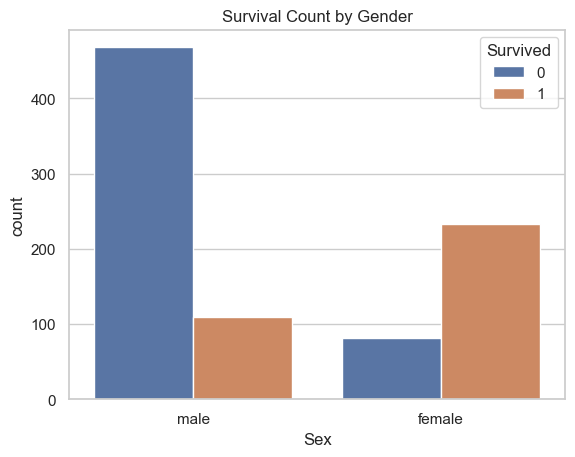

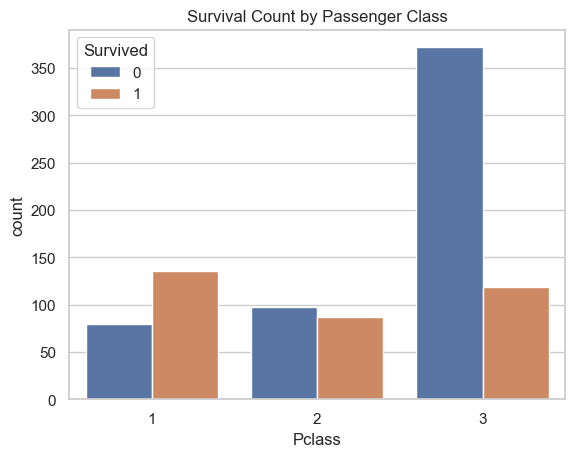

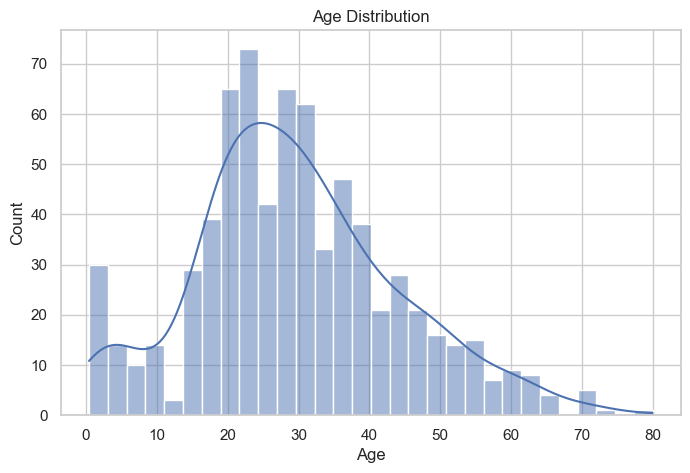

ValueError: could not convert string to float: 'Braund, Mr. Owen Harris'

<Figure size 1000x600 with 0 Axes>

In [3]:
sns.countplot(x="Sex", hue="Survived", data=train_df)
plt.title("Survival Count by Gender")
plt.show()

sns.countplot(x="Pclass", hue="Survived", data=train_df)
plt.title("Survival Count by Passenger Class")
plt.show()

plt.figure(figsize=(8, 5))
sns.histplot(train_df["Age"], bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(train_df.corr(), annot=True, cmap = "YlGnBu")
plt.title("Correlation Heatmap")
plt.show

In [20]:
print(train_df[["Pclass", "Survived"]].groupby("Pclass").mean())
print(train_df[["Sex", "Survived"]].groupby("Sex").mean())
print(train_df[["Embarked", "Survived"]].groupby("Embarked").mean())

merged_df = test_df.merge(gender_df, on="PassengerId", how="left")
print(merged_df.head())

        Survived
Pclass          
1       0.629630
2       0.472826
3       0.242363
        Survived
Sex             
female  0.742038
male    0.188908
Empty DataFrame
Columns: [Survived]
Index: []
   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  Survived  
0  34.5      0      0   330911   7.8292   NaN        Q         0  
1  47.0      1      0   363272   7.0000   NaN        S         1  
2  62.0      0      0   240276   9.6875   NaN        Q         0  
3  27.0      0      0   315154   8.6625   NaN       